In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [106]:
plt.style.use('fivethirtyeight')

In [107]:
df = pd.read_csv('../financial_data.csv' , parse_dates = ['Unnamed: 0']).rename(columns = {'Unnamed: 0' : 'date'}).set_index('date')

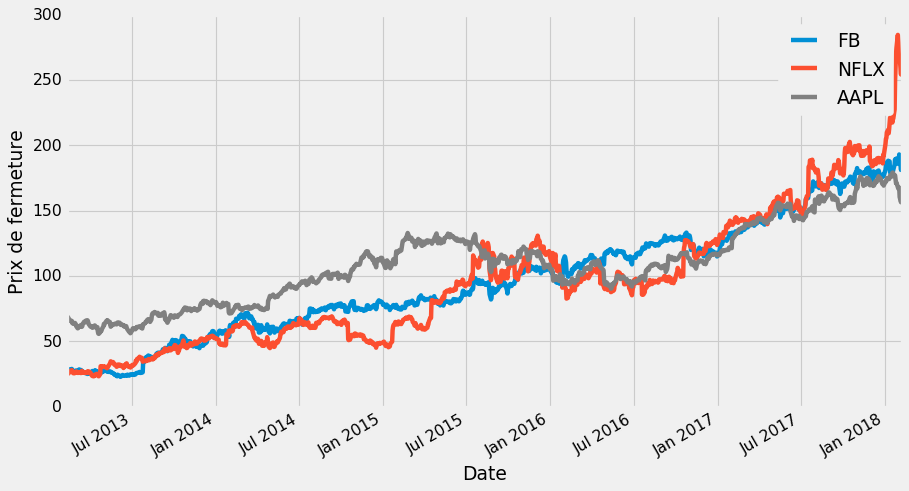

In [108]:
plt.figure(figsize = (12,7))
df['FB'].plot(label = 'FB')
df['NFLX'].plot(label = 'NFLX')
df['AAPL'].plot(label = 'AAPL' , color = 'grey')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Prix de fermeture')
plt.savefig('cours.png')

In [109]:
data = pd.read_csv('../all_stocks_5yr.csv' , parse_dates = ['date']).set_index('date')
data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


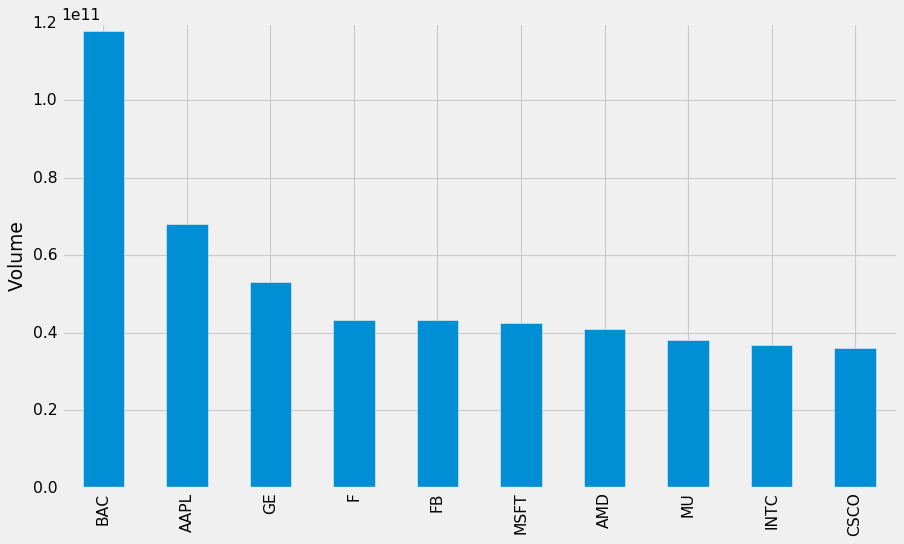

In [110]:
plt.figure(figsize = (12,7))
data.groupby('Name').volume.sum().sort_values(ascending = False).head(10).plot('bar')
plt.xlabel('')
plt.ylabel('Volume')
plt.savefig('volume.png')

In [111]:
median = data.groupby('Name').volume.sum().sort_values(ascending = False).median()
d = pd.DataFrame(data.groupby('Name').volume.sum().sort_values(ascending = False))
dsup = data[data.volume > median]
dinf = data[data.volume <= median]
dsup

,open,high,low,close,volume,Name
date,,,,,,


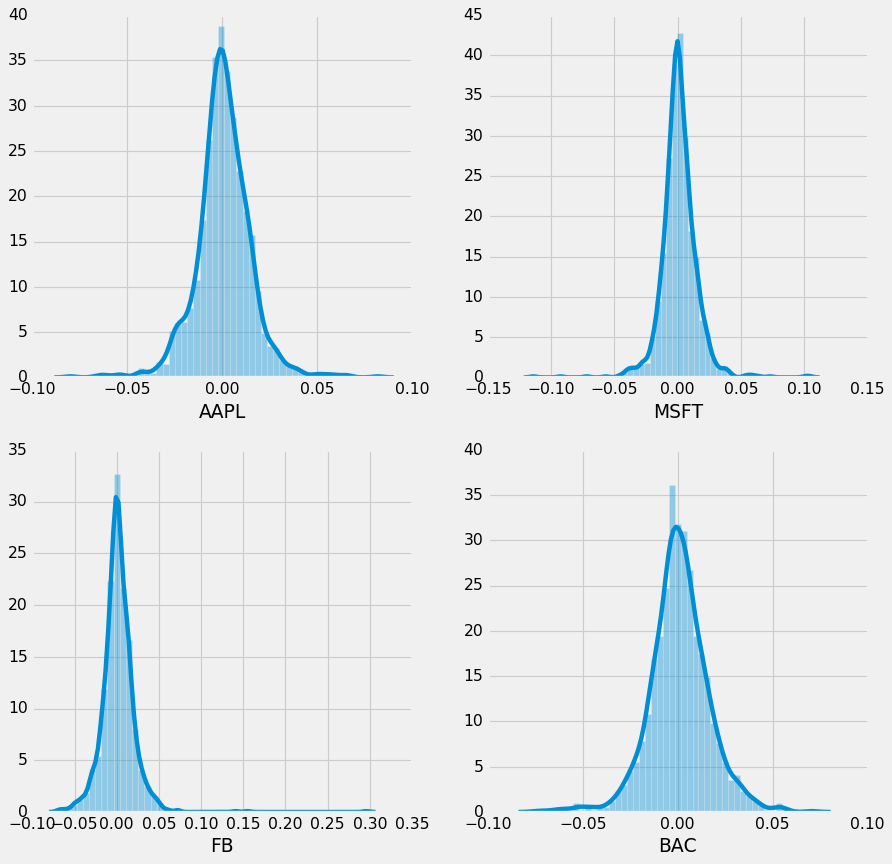

In [112]:
df_pct = df.pct_change().dropna().reset_index()
companies = ['AAPL' , 'MSFT' , 'FB' , 'BAC']
plt.subplots(2 , 2 , figsize = (12,12))
for i , c in enumerate(companies):
    plt.subplot(2 , 2 , i+1)
    sns.distplot(df_pct[c])
plt.savefig('dist.png')

In [113]:
from datetime import datetime

futures = pd.read_csv('../futures.csv' , parse_dates = ['Date']).set_index('Date')
futures = futures[(futures.index >= datetime(2013 , 2 , 8)) & (futures.index <= datetime(2018 , 2 , 7))][::-1]
#print(futures.head())
index = pd.DataFrame(futures['Last']  , index = futures.index).rename(columns = {'Last' : 'Index'})
index.head()

,Index
Date,
2013-02-08,1513.75
2013-02-11,1513.00
2013-02-12,1517.75
2013-02-13,1516.25
2013-02-14,1518.75


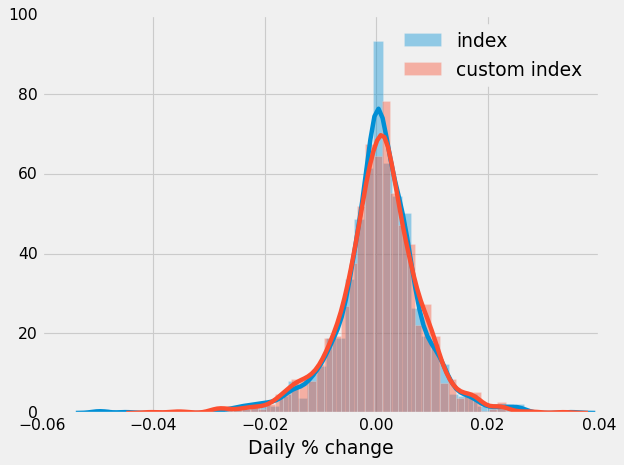

In [114]:
custom = pd.read_csv('custom_index.csv' , parse_dates = ['date']).set_index('date')
sns.distplot(index.pct_change().dropna() , label = 'index')
sns.distplot(custom.pct_change().dropna() , label = 'custom index')
plt.legend()
plt.xlabel('Daily % change')
plt.savefig('custind.png')

In [115]:
print('Tickers average mean and std : {} ; {}'.format( df_pct.mean().mean() , df_pct.std().mean()))
print('Custom Index mean and std : {} ; {}'.format( float(custom.pct_change().dropna().mean()) , float(custom.pct_change().dropna().std())))
print('S&P500 Index mean and std : {} ; {}'.format( float(index.pct_change().dropna().mean()) , float(index.pct_change().dropna().std())))

Tickers average mean and std : 0.0005475151089693772 ; 0.015332682283268903
Custom Index mean and std : 0.000451754623091998 ; 0.007751677318568267
S&P500 Index mean and std : 0.0004804641391932319 ; 0.007763367144457281


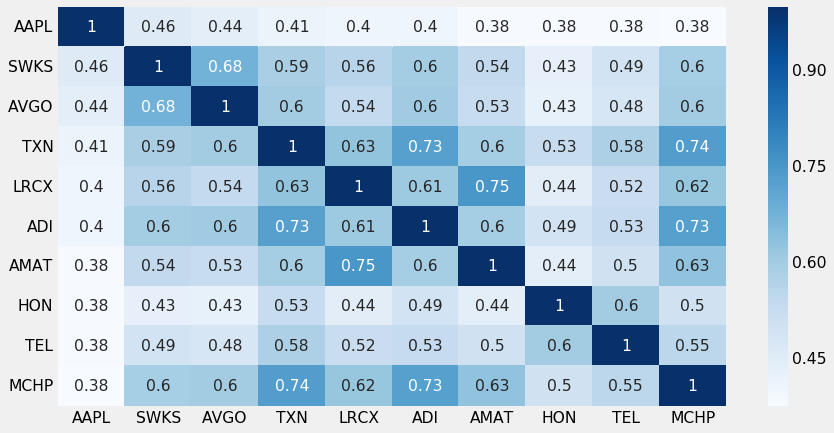

In [116]:
#Analyse de corrélation pour Apple : 
plt.figure(figsize = (12,6))
index = df_pct.set_index('date').corr()['AAPL'].sort_values(ascending = False)[:10].index
sns.heatmap(df_pct.set_index('date').corr().loc[index , index] , annot = True , cmap = 'Blues')
plt.savefig('apple_correlation.png')